C:\Users\anhng\AppData\Local\Temp\ipykernel_11376\4091440864.py:16: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, usecols=use_columns)
C:\Users\anhng\AppData\Local\Temp\ipykernel_11376\4091440864.py:16: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, usecols=use_columns)
C:\Users\anhng\AppData\Local\Temp\ipykernel_11376\4091440864.py:16: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, usecols=use_columns)
C:\Users\anhng\AppData\Local\Temp\ipykernel_11376\4091440864.py:16: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, usecols=use_columns)
C:\Users\anhng\AppData\Local\Temp\ipykernel_11376\4091440864.py:16: DtypeWarning: Columns (8) have mixed types. Specify dtyp

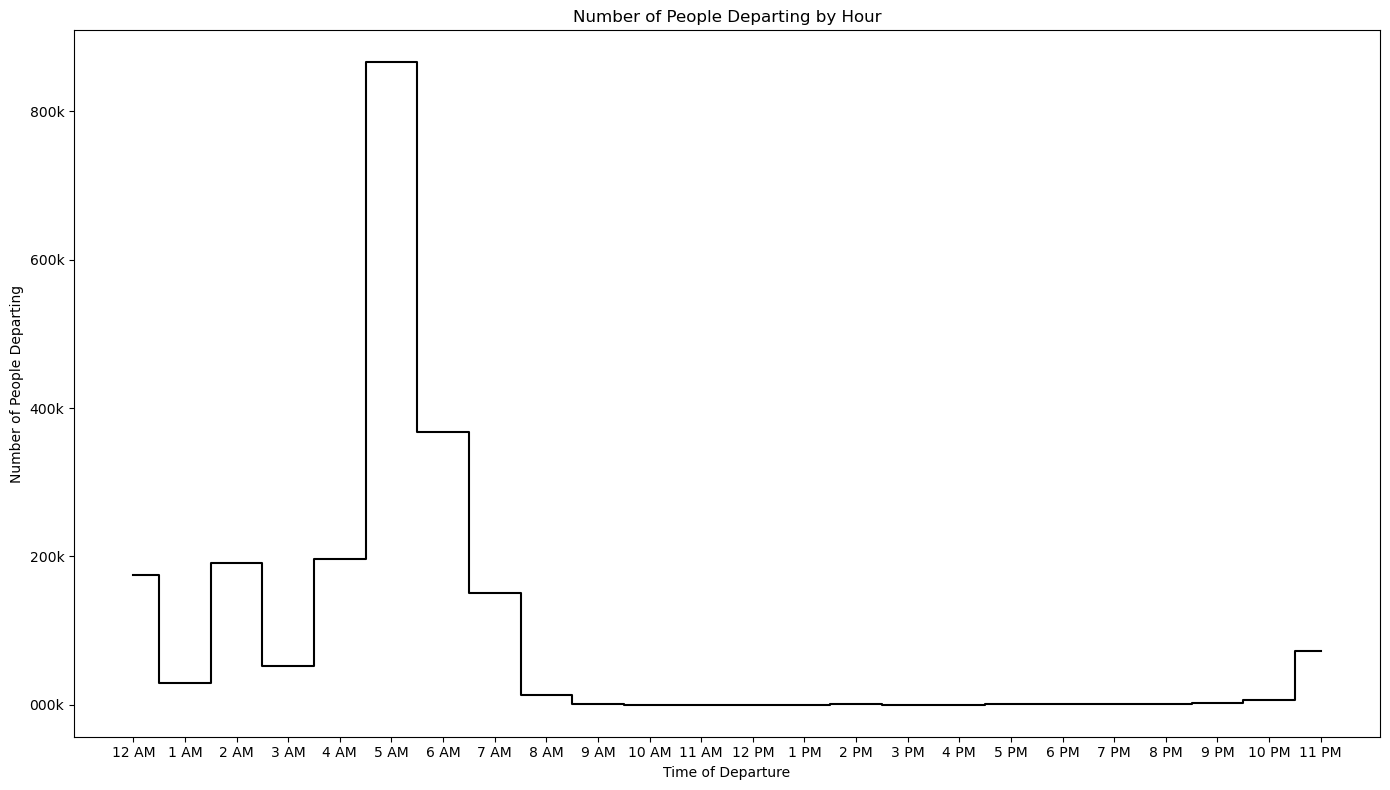

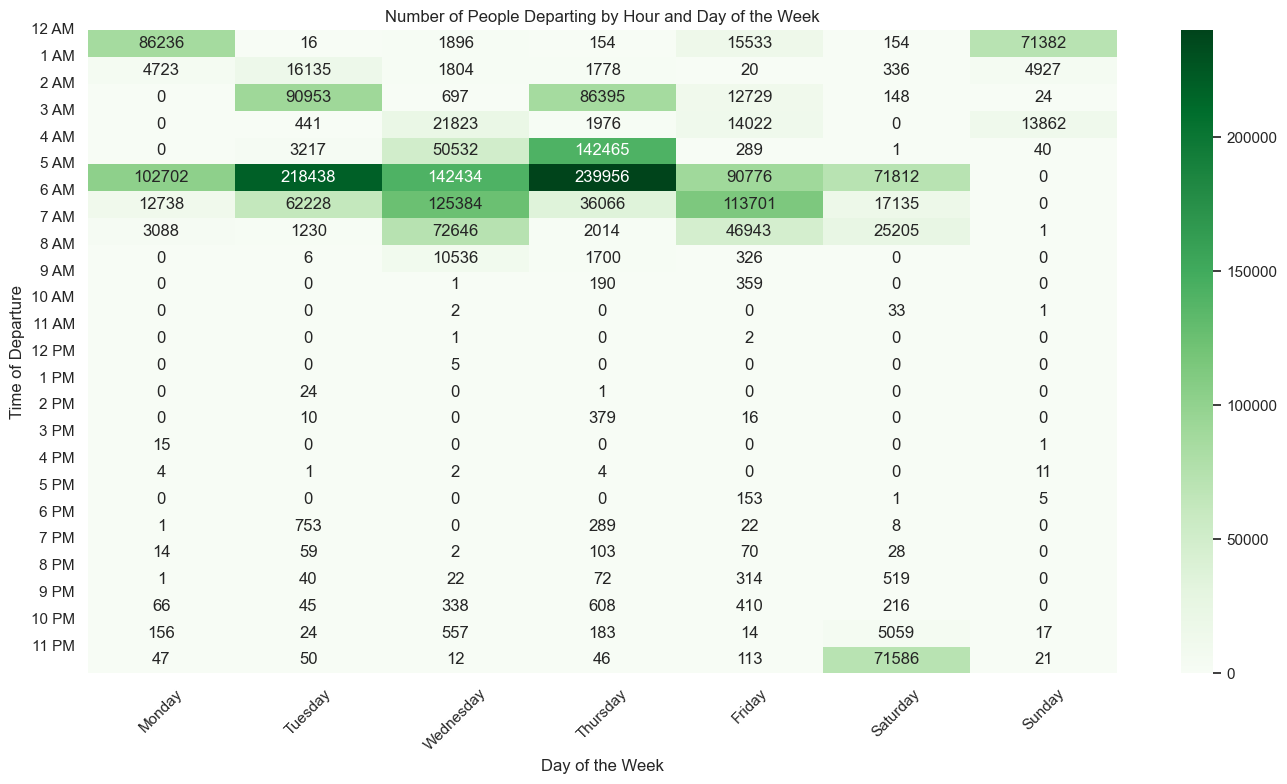

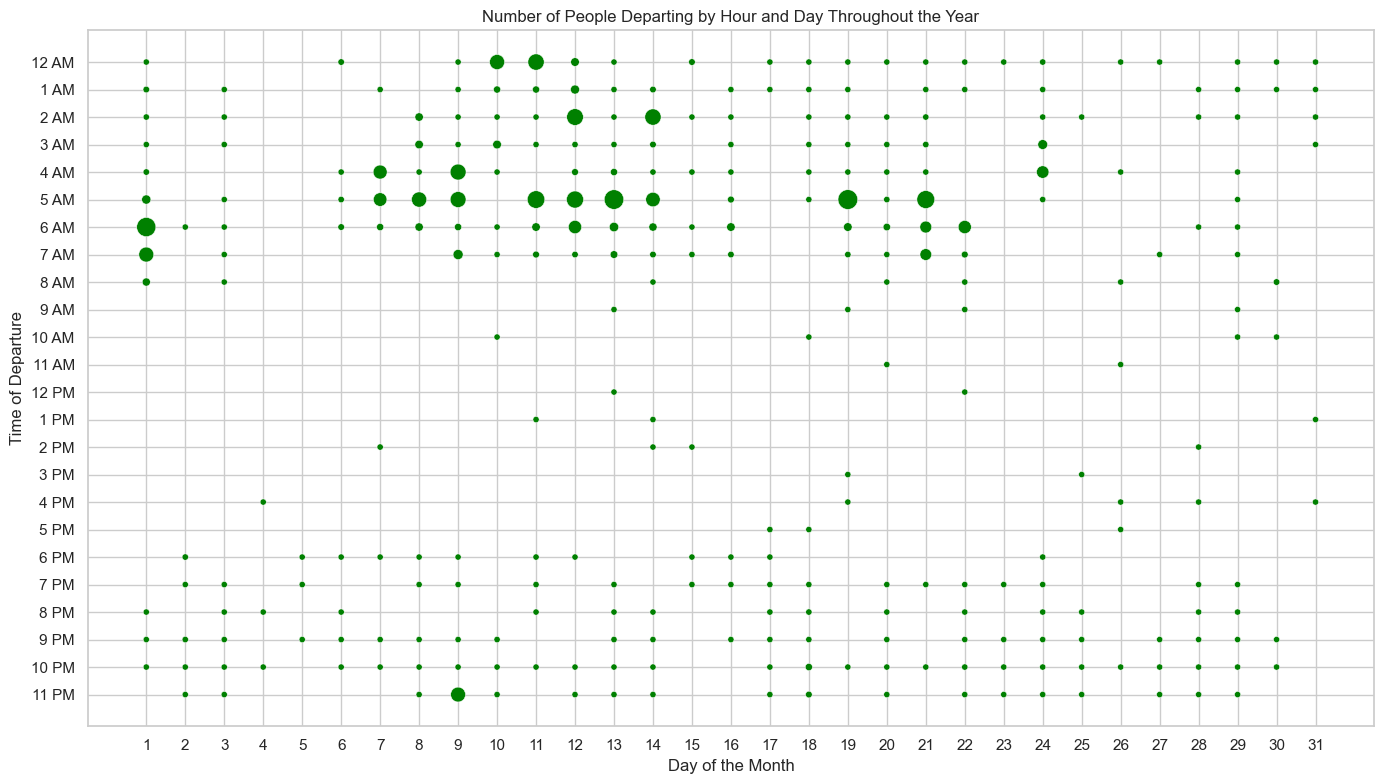

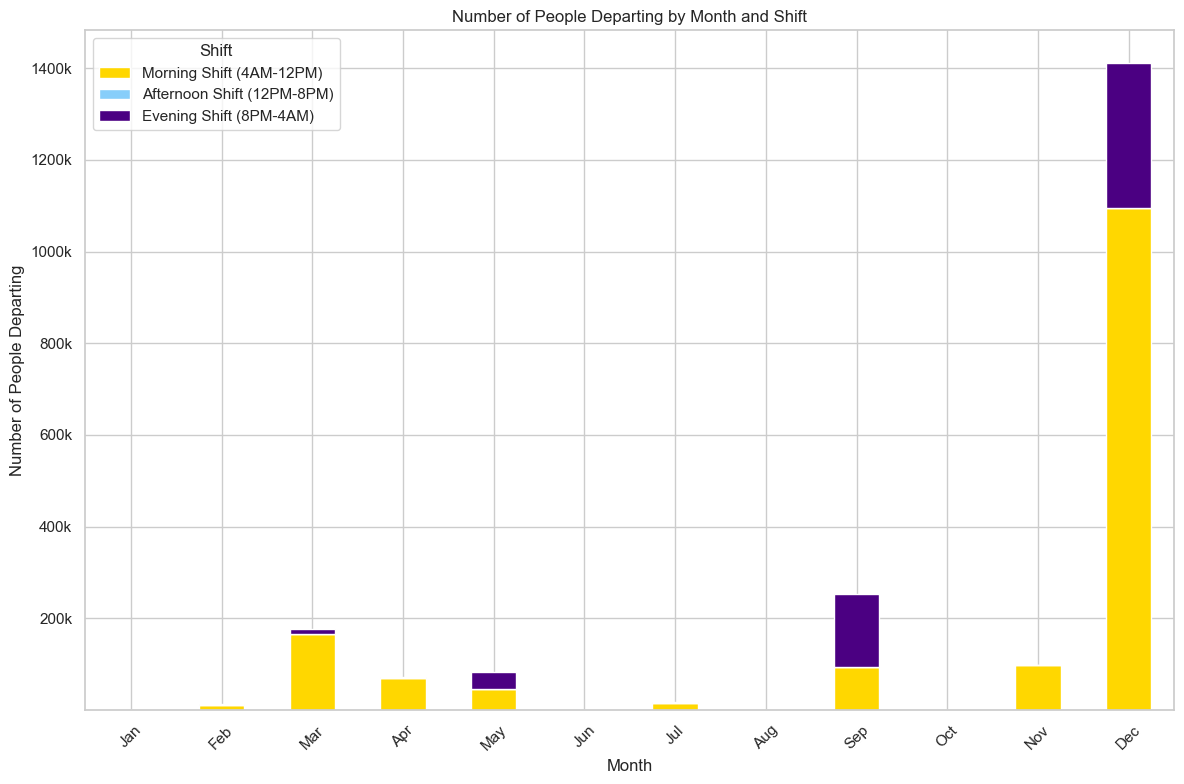

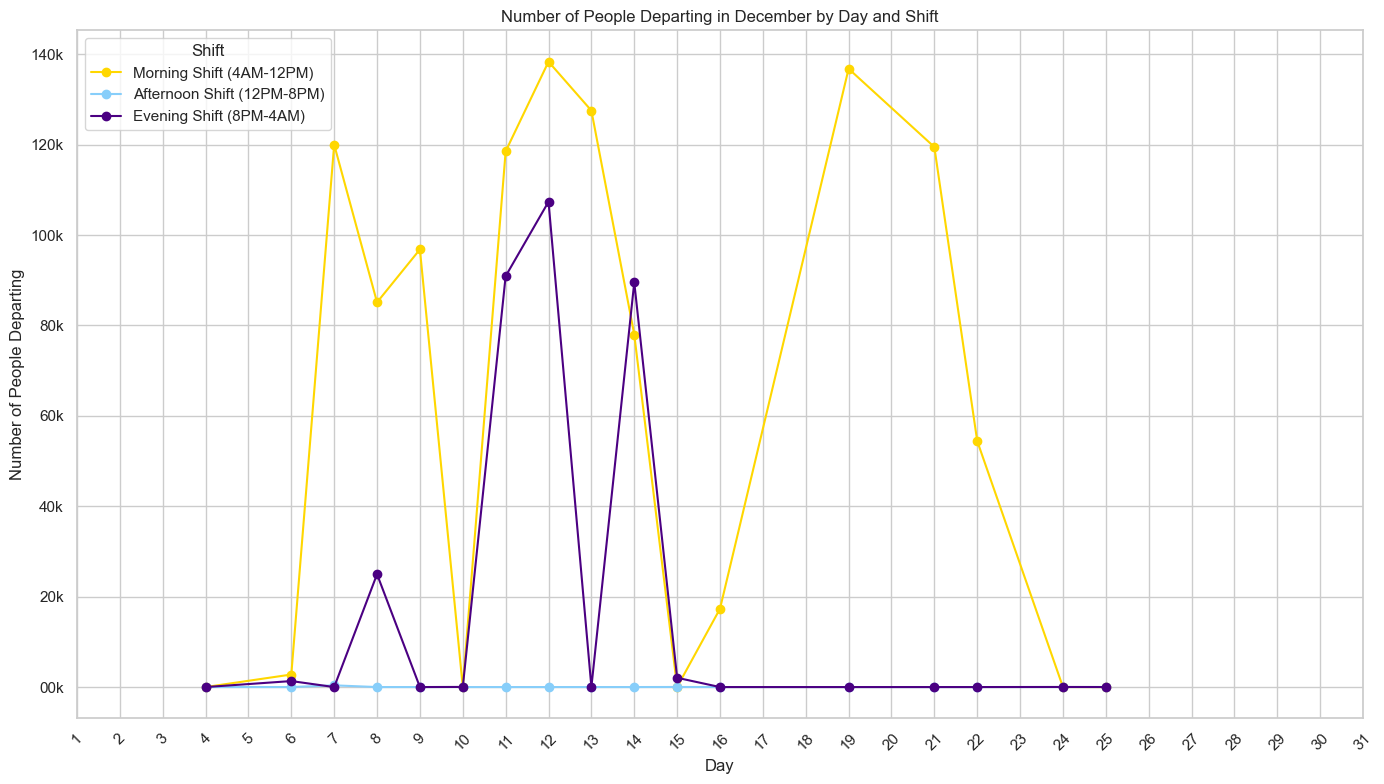

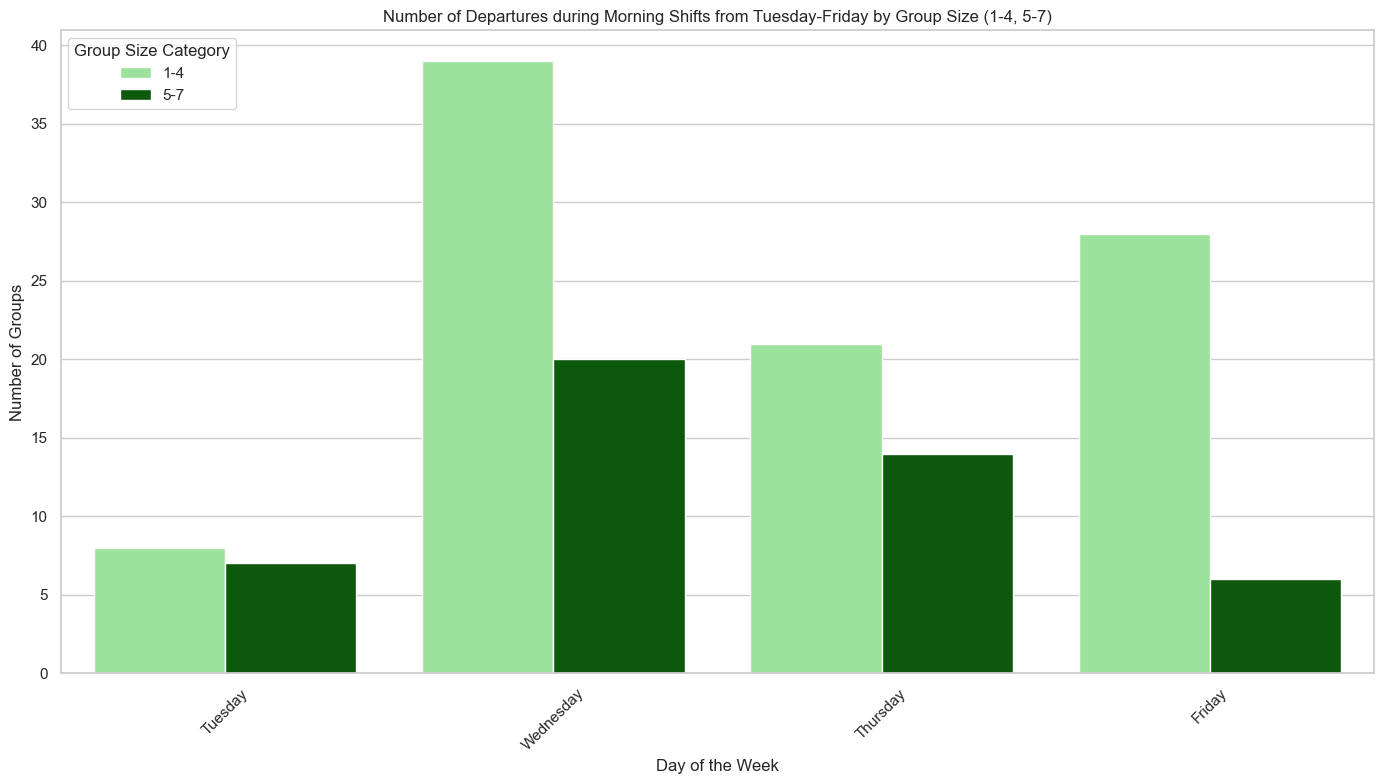

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Define the columns to use
use_columns = ['TOD', 'Total People', 'Meeting Location']

# Create an empty list to hold dataframes
dfs = []

# Loop through each month to read the files and append them to the list
for month in range(1, 13):
    file_name = f"C:/Users/anhng/Documents/Masters/640/2023.{month:02d}_WAVES-ACCESS-RECORDS.csv"
    df = pd.read_csv(file_name, usecols=use_columns)
    df['TOD'] = pd.to_datetime(df['TOD'], errors='coerce')
    df = df.dropna(subset=['TOD'])
    dfs.append(df)

# Concatenate all dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

# Ensure 'Date' and 'Time' columns are in correct format
combined_df['Date'] = combined_df['TOD'].dt.date
combined_df['Time'] = combined_df['TOD'].dt.time
combined_df['Time'] = pd.to_datetime(combined_df['Time'].astype(str)).dt.strftime('%I:%M %p')

# Clean up dataframe
combined_df = combined_df.drop(columns=['TOD'])
combined_df = combined_df[['Date', 'Time', 'Total People', 'Meeting Location']]

# Fill NaN values in 'Total People' with 0 and convert to integer
combined_df['Total People'] = combined_df['Total People'].fillna(0).astype(int)

# Create a step chart showing total number of people leaving every hour
def plot_step_chart(df):
    df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.hour
    aggregated_data = df.groupby(['Hour'])['Total People'].sum().reset_index()

    plt.figure(figsize=(14, 8))
    plt.step(aggregated_data['Hour'], aggregated_data['Total People'], where='mid', color='black')
    plt.title('Number of People Departing by Hour')
    plt.xlabel('Time of Departure')
    plt.ylabel('Number of People Departing')
    plt.xticks(range(24), ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
                           '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x / 100000)) + '00k'))
    plt.tight_layout()
    plt.show()

# Create a heatmap showing total number of people leaving every hour by day of the week
def plot_heatmap(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day of Week'] = df['Date'].dt.dayofweek
    df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
    df['Hour'] = df['Time'].dt.hour
    heatmap_data = df.pivot_table(index='Hour', columns='Day of Week', values='Total People', aggfunc='sum', fill_value=0)

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    sns.heatmap(heatmap_data, cmap='Greens', annot=True, fmt='g') 
    plt.title('Number of People Departing by Hour and Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Time of Departure')
    plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
    plt.yticks(ticks=range(24), labels=['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM',
                                        '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'], rotation=0)
    plt.tight_layout()
    plt.show()

# Create a scatter plot showing number of people leaving by hour by day of the month
def plot_scatter_plot(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M %p').dt.hour
    aggregated_data = df.groupby(['Day', 'Hour'])['Total People'].sum().reset_index()

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    scatter_plot = sns.scatterplot(data=aggregated_data, x='Day', y='Hour', size='Total People', sizes=(20, 200), legend=False, color='green')
    scatter_plot.set_ylim(scatter_plot.get_ylim()[::-1])
    scatter_plot.set_yticks(range(24))
    scatter_plot.set_yticklabels(['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
                                  '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])
    plt.title('Number of People Departing by Hour and Day Throughout the Year')
    plt.xlabel('Day of the Month')
    plt.ylabel('Time of Departure')
    plt.xticks(range(1, 32))
    plt.tight_layout()
    plt.show()

# Create a bar plot showing number of people departing in terms of taxi driver shift timeframes by month
def plot_monthly_bar_chart(df):
    df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')

    def categorize_time(time_str):
        time = pd.to_datetime(time_str, format='%I:%M %p')
        hour = time.hour
        if 4 <= hour < 12:
            return 'Morning Shift (4AM-12PM)'
        elif 12 <= hour < 20:
            return 'Afternoon Shift (12PM-8PM)'
        else:
            return 'Evening Shift (8PM-4AM)'

    df['Time Period'] = df['Time'].apply(categorize_time)
    df['Month'] = df['Date'].dt.month
    aggregated_data = df.groupby(['Month', 'Time Period'])['Total People'].sum().reset_index(name='Total People')

    sns.set(style="whitegrid")
    pivot_table = aggregated_data.pivot(index='Month', columns='Time Period', values='Total People').fillna(0)
    
    colors = {
        'Morning Shift (4AM-12PM)': '#FFD700', 
        'Afternoon Shift (12PM-8PM)': '#87CEFA', 
        'Evening Shift (8PM-4AM)': '#4B0082'
    }
    
    ax = pivot_table[['Morning Shift (4AM-12PM)', 'Afternoon Shift (12PM-8PM)', 'Evening Shift (8PM-4AM)']].plot(
        kind='bar', stacked=True, figsize=(12, 8), color=[colors['Morning Shift (4AM-12PM)'], colors['Afternoon Shift (12PM-8PM)'], colors['Evening Shift (8PM-4AM)']]
    )
    plt.title('Number of People Departing by Month and Shift')
    plt.xlabel('Month')
    plt.ylabel('Number of People Departing')
    plt.legend(title='Shift', labels=['Morning Shift (4AM-12PM)', 'Afternoon Shift (12PM-8PM)', 'Evening Shift (8PM-4AM)'])  # Reordered legend
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x / 100000)) + '00k'))
    plt.tight_layout()
    plt.show()

# Create a line graph showing number of people departing in terms of taxi driver shift timeframes by day in December
def plot_december_line_chart(df):
    def categorize_time(time_str):
        time = pd.to_datetime(time_str, format='%I:%M %p')
        hour = time.hour
        if 4 <= hour < 12:
            return 'Morning Shift (4AM-12PM)'
        elif 12 <= hour < 20:
            return 'Afternoon Shift (12PM-8PM)'
        else:
            return 'Evening Shift (8PM-4AM)'

    df['Date'] = pd.to_datetime(df['Date'])
    df = df[df['Date'].dt.month == 12].copy()
    df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
    df['Time Period'] = df['Time'].apply(categorize_time)
    df['Day'] = df['Date'].dt.day
    aggregated_data = df.groupby(['Day', 'Time Period'])['Total People'].sum().reset_index(name='Total People')
    pivot_table_dec = aggregated_data.pivot(index='Day', columns='Time Period', values='Total People').fillna(0)

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    colors = {
        'Morning Shift (4AM-12PM)': '#FFD700', 
        'Afternoon Shift (12PM-8PM)': '#87CEFA', 
        'Evening Shift (8PM-4AM)': '#4B0082'
    }
    for column in ['Morning Shift (4AM-12PM)', 'Afternoon Shift (12PM-8PM)', 'Evening Shift (8PM-4AM)']:
        plt.plot(pivot_table_dec.index, pivot_table_dec[column], marker='o', label=column, color=colors[column])
    
    plt.title('Number of People Departing in December by Day and Shift')
    plt.xlabel('Day')
    plt.ylabel('Number of People Departing')
    plt.legend(title='Shift', labels=['Morning Shift (4AM-12PM)', 'Afternoon Shift (12PM-8PM)', 'Evening Shift (8PM-4AM)'], loc='upper left')  # Reordered legend and moved to top left
    plt.xticks(range(1, 32), [str(i) for i in range(1, 32)], rotation=45)
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x / 10000)) + '0k'))  
    plt.tight_layout()
    plt.show()

# Create a bar chart showing number of group sizes departing in terms of taxi driver shift timeframes by day of the week
def plot_bar_chart(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day of Week'] = df['Date'].dt.dayofweek
    df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
    df['Time Period'] = df['Time'].apply(lambda x: 'Morning Shift (4AM-12PM)' if 4 <= x.hour < 12 else 'Afternoon Shift (12PM-8PM)' if 12 <= x.hour < 20 else 'Evening Shift (8PM-4AM)')
    morning_shift_df = df[(df['Day of Week'].isin([1, 2, 3, 4])) & (df['Time Period'] == 'Morning Shift (4AM-12PM)')]
    morning_shift_df = morning_shift_df[morning_shift_df['Total People'] <= 8]
    morning_shift_df['Group Size Category'] = pd.cut(morning_shift_df['Total People'], bins=[0, 4, 7], labels=['1-4', '5-7'])
    group_size_data_agg = morning_shift_df.groupby(['Day of Week', 'Group Size Category'], observed=False)['Total People'].count().reset_index()
    group_size_data_agg = group_size_data_agg.rename(columns={'Total People': 'Number of Groups'})

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))
    
    custom_palette = {'1-4': '#90EE90', 
                      '5-7': '#006400'} 

    ax = sns.barplot(data=group_size_data_agg, x='Day of Week', y='Number of Groups', hue='Group Size Category', palette=custom_palette)
    plt.title('Number of Departures during Morning Shifts from Tuesday-Friday by Group Size (1-4, 5-7)')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Groups')
    plt.legend(title='Group Size Category', loc='upper left') 
    plt.xticks(ticks=[0, 1, 2, 3], labels=['Tuesday', 'Wednesday', 'Thursday', 'Friday'], rotation=45)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.tight_layout()
    plt.show()

# Plot the charts
plot_step_chart(combined_df)
plot_heatmap(combined_df)
plot_scatter_plot(combined_df)
plot_monthly_bar_chart(combined_df)
plot_december_line_chart(combined_df)
plot_bar_chart(combined_df)